In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation,rc

In [2]:
# Initializing the grid
def init_grid(rows, cols):
    grid = np.zeros([rows, cols])
    for i in range(rows):
        for j in range(cols):
            grid[i][j] = round(random.random())
    return grid

In [3]:
grid = init_grid(3,3)
print(grid)

[[0. 0. 0.]
 [0. 0. 1.]
 [1. 0. 1.]]


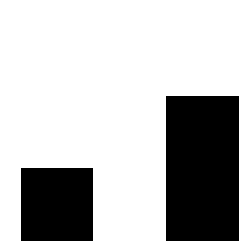

In [4]:
ax = plt.axes()
ax.matshow(grid,cmap=cm.binary)
ax.set_axis_off()

In [5]:
def nextGeneration(grid, param):
    overpop, underpop, newcell = param
    rows, cols = grid.shape
    newgrid = np.zeros([rows, cols])
    neighbors = np.zeros([rows,cols])
    
    padgrid = np.zeros([rows+2, cols+2])
    padgrid[:-2,:-2] = grid
    # Compute neighbours and newgrid by adding [i-1, i, i+1]*[j-1, j, j+1] and then subtract the center (i,j)
    for i in range(rows):
        for j in range(cols):
            neighbors[i][j] += sum([padgrid[a][b] for a in [i-1, i, i+1] for b in [j-1, j, j+1]])
            neighbors[i][j] -= padgrid[i][j]
            # Evolution logic
            newgrid[i][j] = grid[i][j]
            if grid[i][j] and (neighbors[i][j] > overpop or neighbors[i][j] < underpop):
                newgrid[i][j] = 0
            elif not grid[i][j] and neighbors[i][j] == newcell:
                newgrid[i][j] = 1
    return newgrid

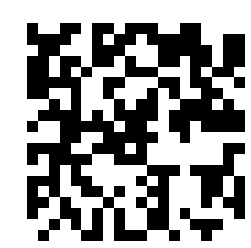

In [6]:
param = 3, 2, 3
rows, cols = 20, 20
fig = plt.figure()
ax = plt.axes()
im = ax.matshow(init_grid(rows,cols),cmap=cm.binary)
ax.set_axis_off()



In [7]:
def init():
    im.set_data(init_grid(rows, cols))
    return(im,)
 
def animate(i):
    a = im.get_array()
    a = nextGeneration(a, param)
    im.set_array(a)
    return [im]

In [8]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)

In [9]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
# anim._repr_html_() is None
# anim

In [ ]:
# rc('animation', html='html5')
# anim

In [10]:
# pulsar input for initializing 
def init_pulsar():
    grid = np.zeros([15, 15])
    line = np.zeros(15)
    line[3:6] = 1
    line[9:12] = 1
    for ind in [1,6,8,13]:
        grid[ind] = line
        grid[:,ind] = line
    return grid 

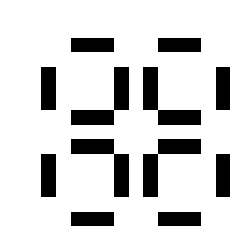

In [11]:
param = 3, 2, 3
fig = plt.figure()
ax = plt.axes()
im = ax.matshow(init_pulsar(),cmap=cm.binary)
ax.set_axis_off()


In [12]:
def init():
    im.set_data(init_pulsar())
    return(im,)
 
def animate(i):
    a = im.get_array()
    a = nextGeneration(a, param)
    im.set_array(a)
    return [im]

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)

In [14]:
HTML(anim.to_html5_video())

In [ ]:
# glider input for initializing
def init_glider_gun():
    glider_gun = 38*'0' + 25*'0'+'1'+12*'0' + 23*'0'+'101'+12*'0' +\
             13*'0'+'11'+6*'0'+'11'+12*'0'+'11'+'0' +\
             12*'0'+'1'+3*'0'+'1'+4*'0'+'11'+12*'0'+'11'+'0' +\
             '0'+'11'+8*'0'+'1'+5*'0'+'100011'+15*'0' +\
             '0'+'11'+8*'0'+'1'+'000'+'1011'+4*'0'+'101'+12*'0' +\
             11*'0'+'1000001'+7*'0'+'1'+12*'0' +\
             12*'0'+'10001'+21*'0' + 13*'0'+'11'+23*'0' + 38*'0' +\
             19*38*'0'
    grid = np.array([float(g) for g in glider_gun]).reshape(30,38)
    return grid

In [ ]:
pars = 3, 2, 3
fig = plt.figure()
ax = plt.axes()
im = ax.matshow(init_glider_gun(),cmap=cm.binary)
ax.set_axis_off()

In [ ]:
def init():
    im.set_data(init_glider_gun())
    return(im,)
 
def animate(i):
    a = im.get_array()
    a = nextGeneration(a, param)
    im.set_array(a)
    return [im]

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True)

In [ ]:
HTML(anim.to_html5_video())